In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

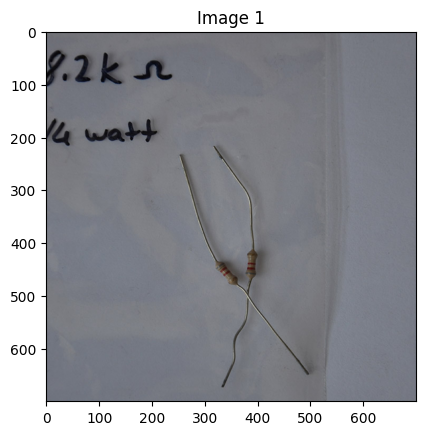

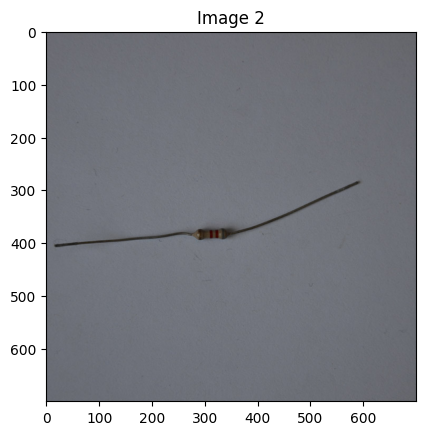

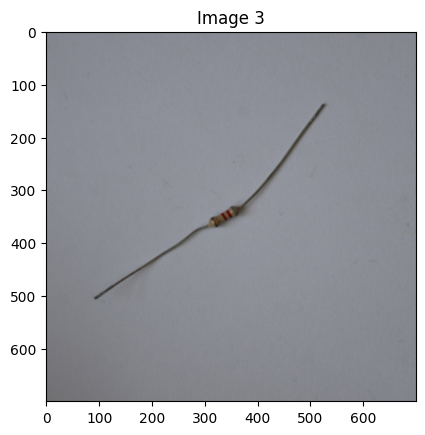

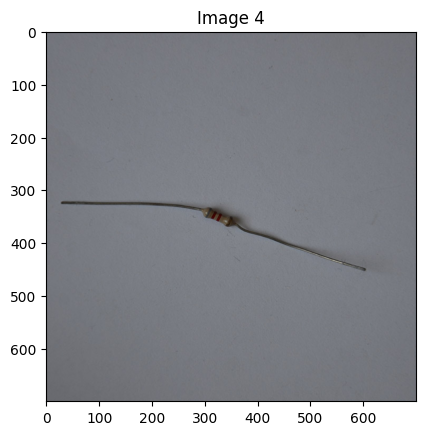

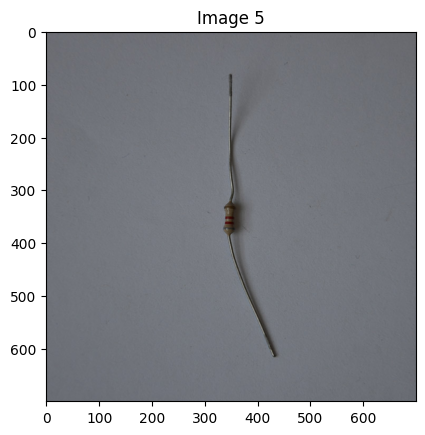

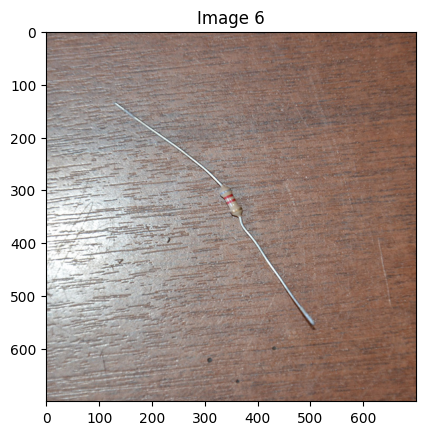

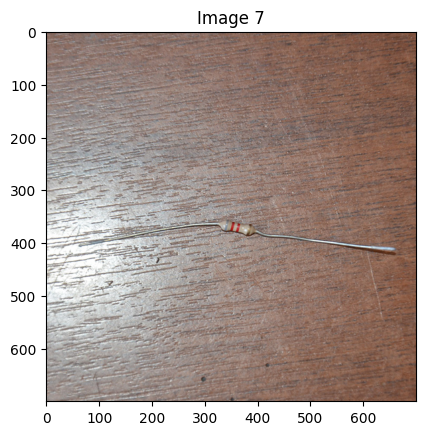

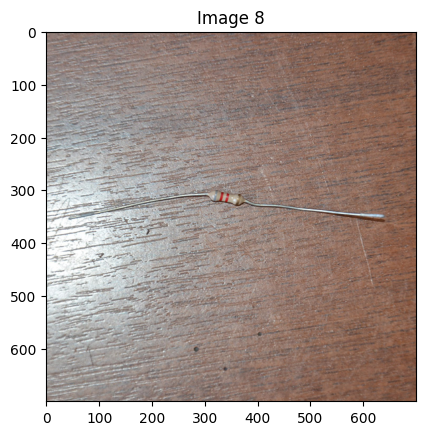

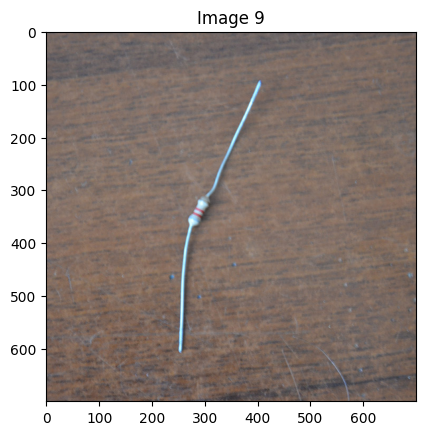

In [ ]:
# Assuming image files named '8K2_1-4W_({1}).jpg', '8K2_1-4W_({2}).jpg', etc.
# in the same directory as your notebook or provide full paths.

for i in range(1, 10):
  filename = f'8K2_1-4W_({i}).jpg'
  globals()[f'image{i}'] = cv2.imread(filename)

# Can now access these images using the variable names.
# Example: Display the images

for i in range(1, 10):
  plt.imshow(cv2.cvtColor(globals()[f'image{i}'], cv2.COLOR_BGR2RGB)) # convert from BGR to RGB for matplotlib
  plt.title(f'Image {i}')
  plt.show()


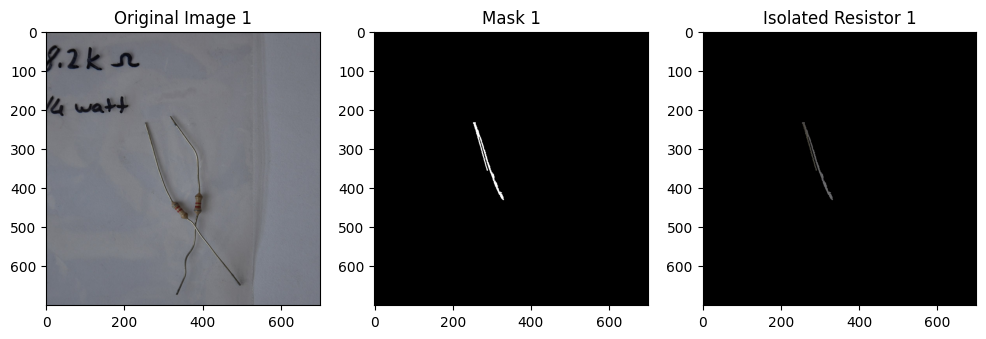

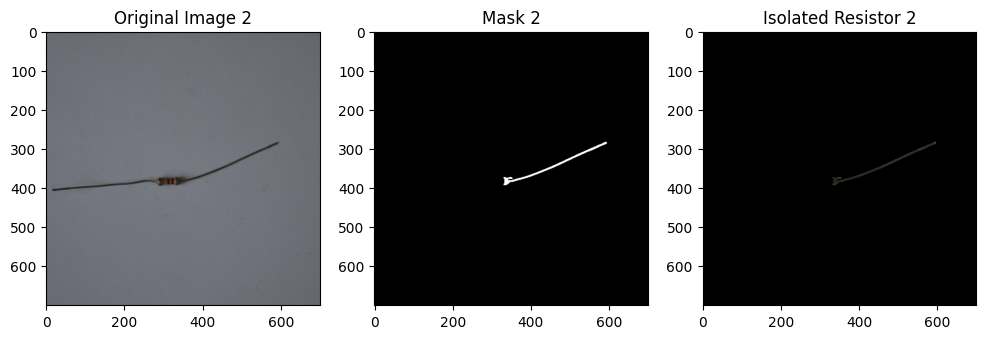

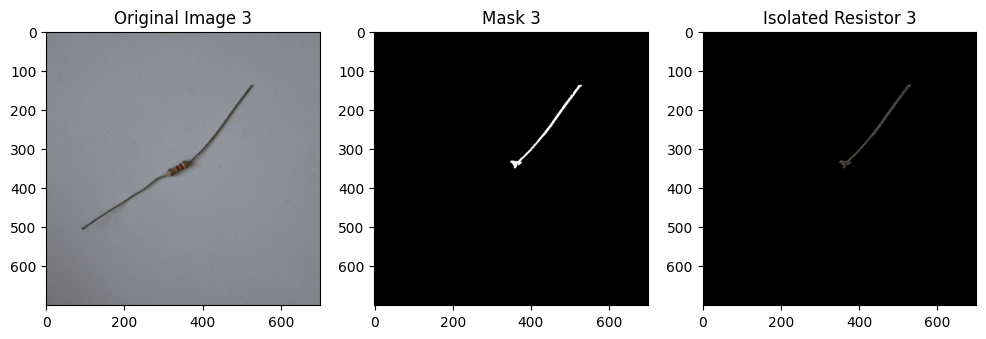

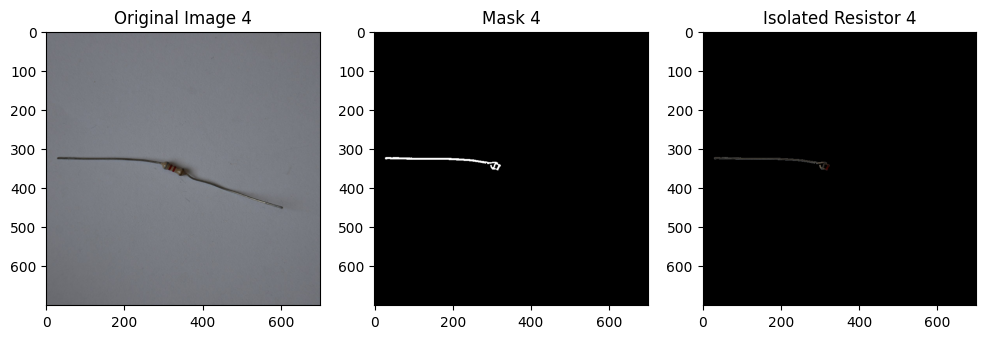

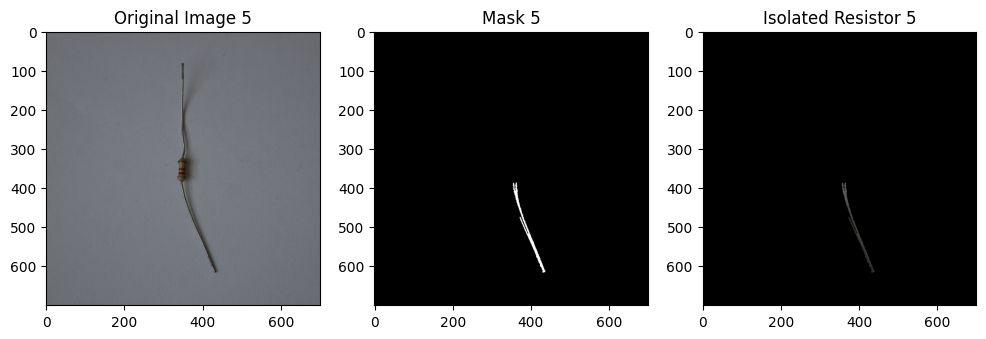

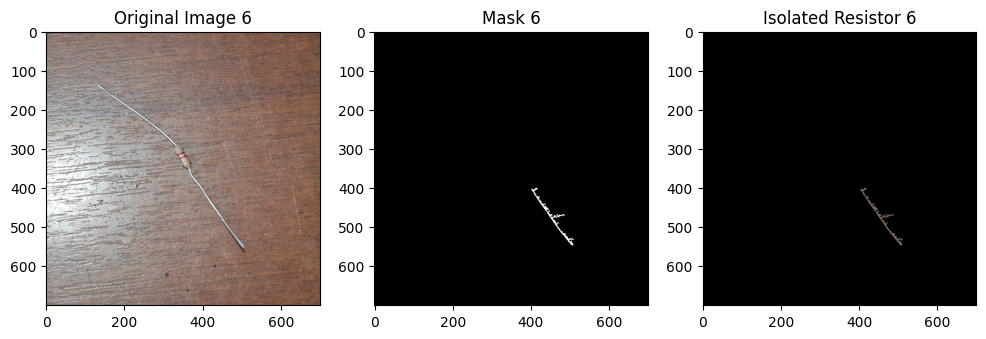

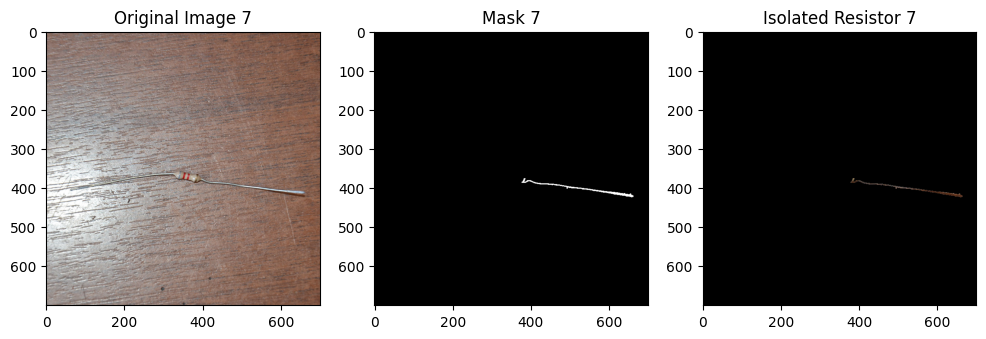

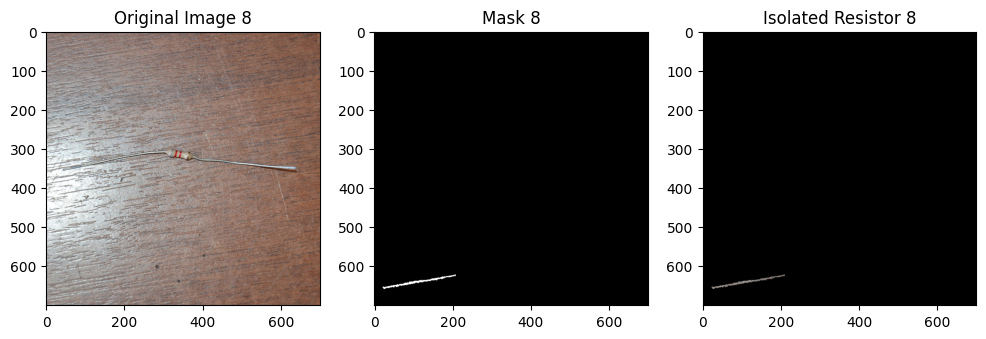

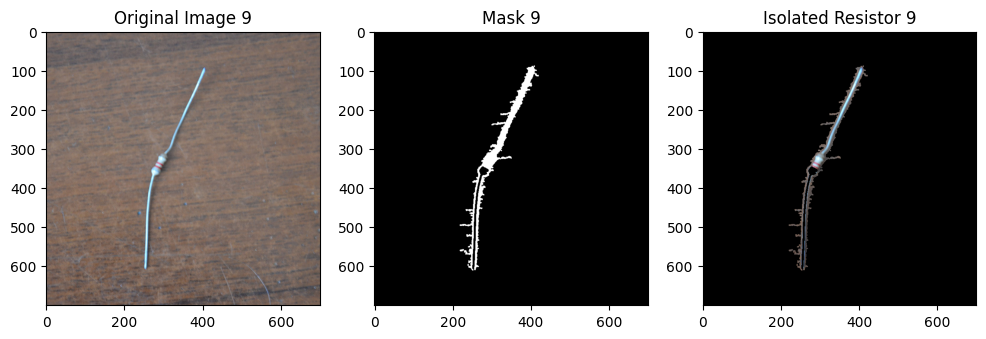

In [ ]:
# prompt: Using the currently set up resistor images, can you create a machine vision software to isolate the resistors from the background?

import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib import pyplot as plt

# ... rest of your code


for i in range(1, 10):
  filename = f'8K2_1-4W_({i}).jpg'
  globals()[f'image{i}'] = cv2.imread(filename)

# You can now access these images using the variable names.
# Example: Display the images and perform image processing

for i in range(1, 10):
  img = globals()[f'image{i}']
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply Gaussian blur to reduce noise
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)

  # Perform adaptive thresholding to create a binary image
  thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

  # ... after thresholding ...
  kernel = np.ones((3,3),np.uint8)  # Adjust kernel size as needed
  opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
  # ... continue with contour detection using 'opening' ...

  # Find contours in the binary image
  contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Find the largest contour (assuming it's the resistor)
  largest_contour = max(contours, key=cv2.contourArea)

  # Create a mask for the resistor
  mask = np.zeros_like(gray)
  cv2.drawContours(mask, [largest_contour], -1, 255, -1)

  # Use the mask to isolate the resistor
  result = cv2.bitwise_and(img, img, mask=mask)


  # Display the original image, the mask, and the isolated resistor
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 3, 1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(f'Original Image {i}')

  plt.subplot(1, 3, 2)
  plt.imshow(mask, cmap='gray')
  plt.title(f'Mask {i}')

  plt.subplot(1, 3, 3)
  plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
  plt.title(f'Isolated Resistor {i}')

  plt.show()
